# Exam 15th of August 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [2]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside, however there is always the possibility the truck breaks down and it goes to the workshop. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop |
|-|-|-|-|-|
| Downtown       | 0.3 | 0.7 | 0 | 0 |
| Suburbs        | 0.2 | 0.5 | 0.3 | 0 |
| Countryside    | 0 | 0 | 0.5 | 0.5 |
| Workshop    | 0 | 0 | 0 | 1 |

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region **the first time** after three time steps or more? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? Furthermore it it reversible? (Explain your answer) [3p]
5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop? Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [3]:
# Part 1
#initialize transition matrix as given
import numpy as np
P = np.matrix([[0.3,0.7,0,0],[0.2,0.5,0.3,0],[0,0,0.5,0.5],[0,0,0,1]])
# Fill in the answer to part 1 below
n = 10                     # assign some specific time-step
p0 = np.matrix([1,0,0,0])    # initial probability vector for initial state (e.g. dry day zero)
pn = p0 * P**n         # probability vector for day n
pn[0,2]                       # probability of "countryside"

problem1_p1 = pn[0,2]
print(problem1_p1)

0.08487353489999999


In [4]:
# Part 2
# Fill in the answer to part 2 below
# only possible way to reach countryside too early is to go downtown -> suburbs-> countryside
# in all other combinations, you reach the countryside after 3 time steps
# prob. of reaching countryside already after two time steps = 0.7*0.3
problem1_p2 = 1- 0.7*0.3
print(problem1_p2)

0.79



## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [5]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False
# When the truck moves to the workshop, it can never move out again / is stuck.
# Therefore, no other state can be reached after the truck reached the workshop
# -> not irreducable

In [6]:
# Part 4
import numpy as np
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
import numpy as np
res = np.linalg.matrix_power(P,1000)
print(res[1,:])
problem1_stationary = [0,0,0,1]
problem1_reversible = False
# the markov chain is reducable and therefore also not reversible.
# From state "workshop" you can never go back to any other state.

[[3.55866532e-105 8.67065843e-105 9.05399445e-105 1.00000000e+000]]


# Part 4

Double click this cell and write your motivation below this line




## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [7]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps

P1 = np.matrix([[0.3,0.7,0],[0.2,0.5,0.3],[0,0,0.5]])
p0 = np.matrix((1,0,0)) 
solution = np.sum([t*p0@np.linalg.matrix_power(P1,t-1)@np.array([P[0,3],P[1,3],P[2,3]])for t in range(1,50)])
print(solution)
problem1_ET = solution

7.713315600321836


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given a "Data Science Salaries" dataset found in `data/salaries.csv`, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a `linear regression` model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

`Experience level`: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.

`Employment type`: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]
2. Split the data into train and test. [1p]
3. Train the model. [1p]
4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


In [8]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd
problem2_df = pd.read_csv("salaries.csv.xls")


FileNotFoundError: [Errno 2] No such file or directory: 'salaries.csv.xls'

In [ ]:
problem2_df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio
0,2023,2,1,85847,100
1,2023,1,2,30000,100
2,2023,1,2,25500,100
3,2023,2,1,175000,100
4,2023,2,1,120000,100
...,...,...,...,...,...
3750,2020,2,1,412000,100
3751,2021,1,1,151000,100
3752,2020,0,1,105000,100
3753,2020,0,2,100000,100


In [ ]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = ["work_year","experience_level","employment_type","remote_ratio"]

# Fill in the target as a string with the correct column name

problem2_target = "salary_in_usd"

In [ ]:
# Part 2


# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
from sklearn.model_selection import train_test_split
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(problem2_df[problem2_features],problem2_df[problem2_target],train_size=0.8,random_state=42)

In [ ]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression
# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train,problem2_y_train)

c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

LinearRegression()

## Part 4

Double click this cell to enter edit mode and write your answer for part 4 below this line.


In [ ]:
problem2_y_test.shape

(751,)

44488.118607673474 3161126689.5785685 0.19926672357276087


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

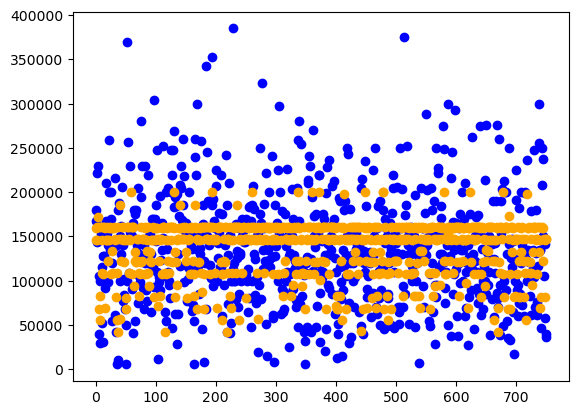

In [ ]:
# Part 4
# Come up with a reasonable metric and compute it.
# Provide plots that show the performance of the model. Reason about the performance. [4p]
# Write the code to diagnose your model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(problem2_y_test,problem2_model.predict(problem2_X_test))
MSE = mean_squared_error(problem2_y_test,problem2_model.predict(problem2_X_test))
R2 = r2_score(problem2_y_test,problem2_model.predict(problem2_X_test))

print(MAE,MSE,R2)

# use MAE, since that is the "true error" summed, therefore easy to interpret

import matplotlib.pyplot as plt
ind = np.array(range(751))
plt.scatter(ind,problem2_y_test,c='blue')
plt.scatter(ind,problem2_model.predict(problem2_X_test),c="orange")

## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [ ]:
# Part 5

#Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1)
# with 0 remote ratio. Then, looking at the output of `problem2_model.coef_`, which are the coefficients
# of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa?

# Put the code for part 5 below this line
data = [[2023,1,1,0]]
X_test = pd.DataFrame(data)
y_predict = problem2_model.predict(X_test)
problem2_model.coef_

121940.38437091932


c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

array([ 1.32911910e+04,  3.89237923e+04, -3.47903893e+03, -1.30294752e+01])

In [ ]:
# Part 5

# since all data in the salary column is given in int, the result is rounded to the nearest integer
problem2_predicted_salary = np.round(y_predict[0])
print(problem2_predicted_salary)

121940.0



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.



c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ellaa\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


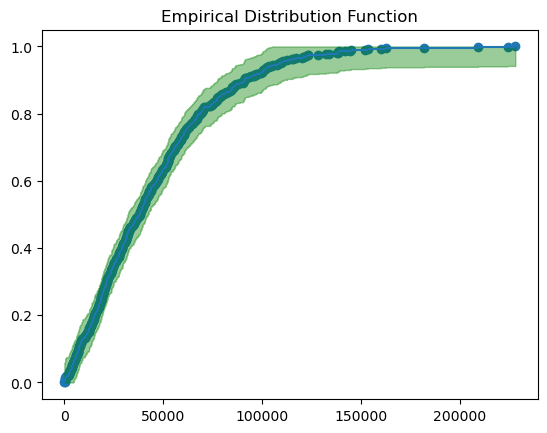

In [ ]:
# Part 6

# Put the code for part 6 below this line

# On the test set, plot the empirical distribution function of the residual with confidence bands
# (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us?
# What can the confidence band be used for?

# what should be the residual? error??
error = np.abs(problem2_y_test -problem2_model.predict(problem2_X_test))
from Utils import makeEDF, plotEDF

edf = makeEDF(error)
plotEDF(edf,confidence_band=True)
       


---
## Exam vB, PROBLEM 3
Maximum Points = 13


## Random variable generation

1. [4p] Using inversion sampling, construct 1000 samples from the below distribution
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        e^x-1, & 0 < x < \ln(2) \\
        1, & x \geq \ln(2)
    \end{cases}
$$
2. [2p] Use the above 1000 samples to estimate the mean and variance
3. [4p] Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) construct 1000 samples from the same distribution, what proposal distribution did you choose and why? What proportion of samples where accepted?
4. [3p] Explain if it is possible to sample from the density
$$
    f(x) = C e^{-(x^2-2)^2}
$$
using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given the Gaussian. Here $C$ is a constant to make sure that $f$ is a density, it between roughly $1.34$ and $1.35$.

In [9]:
# Part 1
import numpy as np
import math
# Write your code below
n=1000
numb = []
for i in range(1000):
    numb.append(np.random.uniform())
x = [math.log(x+1) for x in numb]
print(x)

[0.489245966688512, 0.5410143726925261, 0.42767621104619097, 0.48717569879547884, 0.637294909344298, 0.6112708048877991, 0.16121966663538237, 0.2707278870790942, 0.6291674593302452, 0.4183816586404544, 0.5043672489404809, 0.663987841213005, 0.6295286884161598, 0.5963724657575694, 0.6687400289897761, 0.6404262692020166, 0.27490018554449513, 0.5372625481246162, 0.09836799047173528, 0.4057639880194952, 0.46315078467810683, 0.3270218728719621, 0.5481982624347655, 0.25438576970159693, 0.31861641302222427, 0.1886381785520556, 0.39659522740273, 0.1960575622488711, 0.6443665871304544, 0.6318923939373116, 0.14205842162507656, 0.6657355650904142, 0.5339838436546023, 0.27290201948016674, 0.13288015828626326, 0.47205007871572147, 0.2960082001401832, 0.10167157985042455, 0.4471420058330669, 0.575325128927572, 0.6907914539114122, 0.3854154949638172, 0.04180008050929887, 0.3862531378752777, 0.6762899897351111, 0.18164688369079066, 0.6413896621797897, 0.31191719771761706, 0.2524251099180119, 0.6703238

In [ ]:
# Part 1

# Put the resulting samples into the following variable

problem3_samples = x

In [ ]:
# Part 2

problem3_mean = np.mean(problem3_samples)
print(problem3_mean)
problem3_variance = np.var(problem3_samples)
print(problem3_variance)

0.3920656779322649
0.038851374976018385


In [ ]:
# Part 3

# Write your code to solve the problem below

import math
# uniform distribution on [-1,1], since this covers points where F(x) is not continuous but it is still a uniform distribution
# length of interval = 2
u = np.random.uniform(size = 1000)
samples = np.random.uniform(size = 1000)

#define function F
def F(x):
    if x<= 0:
        return 0
    elif x>=math.log(2):
        return 1
    else:
        return math.exp(x)-1
    
samp_accepted = []
for i in range(n):
    if u[i]<= F(samples[i]): 
        samp_accepted.append(samples[i])
print(len(samp_accepted))

608


In [ ]:
# Part 3

# Write your answer in this cell below

problem3_samples_accept_reject = samp_accepted
print(problem3_samples_accept_reject)
# Put your answer for the proportion of samples accepted below

problem3_acceptance_rate = len(samp_accepted)/len(samples)
print(problem3_acceptance_rate)

[0.40769424220021255, 0.6935687436305298, 0.10387585358874663, 0.7459640766162734, 0.931155044362544, 0.7540472140331911, 0.7652106702015142, 0.6054530494180028, 0.10102777662579199, 0.8316382253746422, 0.5012313518975152, 0.6679709591970102, 0.06376156218776607, 0.7148895055764819, 0.8069264463794601, 0.8533272707167421, 0.7329271118801063, 0.6678633233048857, 0.81030443952773, 0.352509410631323, 0.8088751579110438, 0.9307831637814659, 0.2024986041525918, 0.6631590249090397, 0.702118367883988, 0.23900481727777234, 0.9471347211047669, 0.44413259008135053, 0.9390243146173203, 0.7521699767861706, 0.39702646986861245, 0.9832472829925482, 0.7406727781948851, 0.8719375025566026, 0.49469871895891393, 0.7956502158405588, 0.834685882009008, 0.9664024633230061, 0.9214710699577482, 0.5096682719001495, 0.5192792359539514, 0.8524200605857416, 0.8014284814575463, 0.7927237497716302, 0.8080682131059338, 0.5892879100416617, 0.6163422942448599, 0.19095677978116388, 0.05010476963655275, 0.7583424669038

# Part 3

Double click this cell and write you answer for part 3 below, explain what proposal distibution you chose and why you can choose it.


# Part 4

Double click this cell and write you answer for part 4 below, explain if the Gaussian works as a proposal distribution for this density.

Answer: Yes it is possible, by graphically plotting the Gaussian $\mathcal{N}(0,1)*10$ it can be seen, that this distribution is always greater than $f(x)$. Therefore, $\mathcal{N}(0,1)$ can be used for sampling and $M=10$.